#**Evaluate iterative imputer**
**Separate a train and test set, add in our own missing values**
**Do the imputation of the training set on test set**

**Metric like MSE to assess imputation–for continuous**

**For binary–ROC curve**


#**Imputation: choose the same chemicals as in dan’s nb**
**Double check methodologies for key differences and see changes to be made to google collab** <br>
**Take logs** <br>
**Look at note under MSE root mean SE** <br>
**we could try with 5% missing,10%, 20%, etc to see how it changes** <br>
**Do the roc curve per column** <br> 
**First create a df that is t/f for what we want to make missing.**
**Make this a boolean df t/f at random** <br>
**Take actual dataset and use the t/f df to decide what will be missing** <br>
**The T/f df will be keeping track of our placeholders of missingness and make roc curves down the line easier to plot and more accurate**


# setup

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os 

# Set your working directory to a folder in your Google Drive. This way, if your notebook times out,
# your files will be saved in your Google Drive!

# the base Google Drive directory
root_dir = "/content/drive/My Drive/"

# choose where you want your project files to be saved
project_folder = "thesis/collab notebooks and external code/source"

def create_and_set_working_directory(project_folder):
  # check if your project folder exists. if not, it will be created.
  if os.path.isdir(root_dir + project_folder) == False:
    os.mkdir(root_dir + project_folder)
    print(root_dir + project_folder + ' did not exist but was created.')

  # change the OS to use your project folder as the working directory
  os.chdir(root_dir + project_folder)

  # create a test file to make sure it shows up in the right place
  !touch 'new_file_in_working_directory.txt'
  print('\nYour working directory was changed to ' + root_dir + project_folder + \
        "\n\nAn empty text file was created there. You can also run !pwd to confirm the current working directory." )

create_and_set_working_directory(project_folder)


Your working directory was changed to /content/drive/My Drive/thesis/collab notebooks and external code/source

An empty text file was created there. You can also run !pwd to confirm the current working directory.


In [3]:
!pip install xport

In [4]:
#NAIMAN'S ORIGINAL CODE
# create dictionary of data frames indexed by file names
#
import re
import os
import xport #
import pandas as pd
import numpy as np

L=os.listdir()
L=[x for x in L if re.search("_H.XPT",x)]
df={}
fnames=[]
for x in L:
    #print(x)
    with open(x,"rb") as fin:
        y=x.replace(".XPT","")
        dt=xport.to_dataframe(fin)
        if 'SEQN' in dt.columns:
            fnames.append(x.replace(".XPT",""))
            df[y]=dt
print(len(fnames))

17


In [5]:
# Dan's reduced data frame 
data=pd.read_csv('data.csv')
data.head()

,LBDPFDEL,LBXPFDE,LBXPFHS,LBDPFHSL,LBXMPAH,LBDMPAHL,LBXPFBS,LBDPFBSL,LBXPFHP,LBDPFHPL,...,URXMNP,URDMNPLC,URXMOH,URDMOHLC,URXMZP,URDMZPLC,URXBPF,URDBPFLC,URXBPS,URDBPSLC
0,0.0,0.2,3.0,0.0,0.20,0.0,0.07,1.0,0.07,1.0,...,0.64,1.0,0.8,0.0,0.6,0.0,0.14,1.0,0.07,1.0
1,0.0,0.3,2.0,0.0,0.20,0.0,0.07,1.0,0.07,1.0,...,0.64,1.0,7.7,0.0,4.1,0.0,0.60,0.0,0.20,0.0
2,0.0,0.1,0.2,0.0,0.07,1.0,0.07,1.0,0.07,1.0,...,138.70,0.0,21.9,0.0,6.5,0.0,1.60,0.0,0.50,0.0
3,0.0,0.2,7.6,0.0,0.07,1.0,0.07,1.0,0.20,0.0,...,3.50,0.0,26.4,0.0,14.7,0.0,0.14,1.0,0.40,0.0
4,0.0,0.1,1.2,0.0,0.07,1.0,0.07,1.0,0.07,1.0,...,0.64,1.0,6.8,0.0,2.7,0.0,0.40,0.0,0.70,0.0


#Creating LC comment files for CUSEZN_H (Copper, Selenium & Zinc - Serum) where everything is detect for everyone

In [6]:
df['CUSEZN_H'].head()

,SEQN,WTSA2YR,LBXSCU,LBDSCUSI,LBXSSE,LBDSSESI,LBXSZN,LBDSZNSI,URXUCR
0,73560.0,183653.604036,122.0,19.15,112.2,1.42,79.9,12.22,76.0
1,73564.0,194847.483347,128.0,20.10,131.2,1.67,81.0,12.39,242.0
2,73567.0,100284.090673,128.6,20.19,114.0,1.45,73.2,11.20,215.0
3,73583.0,163017.304491,NaN,NaN,NaN,NaN,NaN,NaN,151.0
4,73585.0,55880.049721,86.1,13.52,114.5,1.45,89.8,13.74,100.0


In [7]:
df['CUSEZN_H']['LBDSCULC']=0
df['CUSEZN_H']['LBDSSELC']=0
df['CUSEZN_H']['LBDSZNLC']=0
df['CUSEZN_H']['URDUCRLC']=0

#making a dictionary of all comment codes for detection. (0 means at or above detection limit, 1 means below)

# d_p_dropna = dictionary of detect percent, omitting the Nan values

In [8]:
#df['AMDGYD_H']
#print(fnames)
d_p = {}
d_p_dropna = {}
for name in fnames:
  # for each chemical , create df with only 'LC' cols
  n = df[name].loc[:,df[name].columns.str.endswith('LC')]
  # get percentage 
  for column in n:
    p = round(((n[column][n[column]==0].count())/len(n))*100,2)
    d_p[column] = p
    p_dropna = round(((n[column][n[column]==0].count())/len(n[column].dropna()))*100,2)
    d_p_dropna[column] = p_dropna


In [9]:
#removing what is not a comment code, but just ends with 'LC'
d_p.pop("URXTLC")
d_p_dropna.pop("URXTLC")

0.0

In [10]:
d_p_dropna

{'LBD2DFLC': 18.39,
 'LBD4CELC': 0.0,
 'LBDACRLC': 100.0,
 'LBDBCDLC': 71.01,
 'LBDBGELC': 0.83,
 'LBDBGMLC': 74.49,
 'LBDBMNLC': 100.0,
 'LBDBPBLC': 100.0,
 'LBDBSELC': 100.0,
 'LBDEOALC': 96.5,
 'LBDFORLC': 100.0,
 'LBDGLYLC': 100.0,
 'LBDIHGLC': 17.39,
 'LBDPFLLC': 86.75,
 'LBDSCULC': 100.0,
 'LBDSSELC': 100.0,
 'LBDSZNLC': 100.0,
 'LBDTHGLC': 74.32,
 'LBDV06LC': 2.22,
 'LBDV07LC': 1.87,
 'LBDV08LC': 1.22,
 'LBDV1DLC': 0.0,
 'LBDV2ALC': 1.5,
 'LBDV3BLC': 0.0,
 'LBDV4CLC': 7.47,
 'LBDVBFLC': 5.48,
 'LBDVBMLC': 12.09,
 'LBDVBZLC': 24.98,
 'LBDVC6LC': 1.7,
 'LBDVCBLC': 0.03,
 'LBDVCFLC': 48.92,
 'LBDVCMLC': 10.39,
 'LBDVCTLC': 0.03,
 'LBDVDBLC': 43.76,
 'LBDVDELC': 0.0,
 'LBDVDXLC': 0.0,
 'LBDVEALC': 1.56,
 'LBDVEBLC': 27.27,
 'LBDVECLC': 0.38,
 'LBDVEELC': 0.2,
 'LBDVFNLC': 14.83,
 'LBDVFTLC': 0.0,
 'LBDVHTLC': 0.84,
 'LBDVIPLC': 0.19,
 'LBDVMCLC': 0.16,
 'LBDVMELC': 2.35,
 'LBDVMPLC': 1.69,
 'LBDVNBLC': 0.0,
 'LBDVOXLC': 26.97,
 'LBDVTCLC': 0.58,
 'LBDVTELC': 0.53,
 'LBDVTOLC': 95.81

In [11]:
len(d_p)

135

In [12]:
#np.percentile(np.array(list(d_p.items())),[0,25,50,75,100])

In [13]:
type(d_p)
L2=np.array(list(d_p.items()))

#Decide which we can treat as binary


In [14]:
# Next step: decide which variables we can treat as binary 
# fit logistic regression to predict a binary variable 

# choose maximum percent value below which the variables will be converted to binary :
  # say 30%
  
# create dictionary of variables we will switch to binary:
binary_variables = {key:val for key, val in d_p_dropna.items() if (val <= 25 or val >= 75)}

In [15]:
binary_dataset = {}

# list of chemical names 
chemicals = []
for key in binary_variables:
  chemicals.append(key)

# dictionary of columns ending in 'LC'
for key in df:
    binary_cols = df[key].loc[:,df[key].columns.str.endswith('LC')]
    binary_dataset[key] = binary_cols


In [16]:
binary_list = []
for key in binary_dataset:
  binary_dataset[key].dropna()
  binary_list.append(binary_dataset[key])


In [17]:
len(binary_list)

17

In [18]:
binary_df = pd.concat(binary_dataset.values())
binary_df.head()

,LBD2DFLC,LBD4CELC,LBDV06LC,LBDV07LC,LBDV08LC,LBDV1DLC,LBDV2ALC,LBDV3BLC,LBDV4CLC,LBDVBFLC,...,URDDEALC,URDDHDLC,LBDEOALC,LBDPFLLC,LBDSCULC,LBDSSELC,LBDSZNLC,URDUCRLC,LBDACRLC,LBDGLYLC
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
binary_df.columns

Index(['LBD2DFLC', 'LBD4CELC', 'LBDV06LC', 'LBDV07LC', 'LBDV08LC', 'LBDV1DLC',
       'LBDV2ALC', 'LBDV3BLC', 'LBDV4CLC', 'LBDVBFLC',
       ...
       'URDDEALC', 'URDDHDLC', 'LBDEOALC', 'LBDPFLLC', 'LBDSCULC', 'LBDSSELC',
       'LBDSZNLC', 'URDUCRLC', 'LBDACRLC', 'LBDGLYLC'],
      dtype='object', length=136)

In [20]:
for col in binary_df.columns:
  if col not in d_p.keys():
    binary_df.drop(col, axis=1)

# First, let's look at overlap with the PFAS Group

In [21]:
#NAIMAN'S ORIGINAL CODE
# For each pair of data frames determine the number of entries in the intersection.
# wanted to know where i have files with multiple chemicals for one person
#
ndf=len(fnames)
M=np.zeros((ndf,ndf))
for i in range(ndf):
    for j in range(ndf):
        fnamei=fnames[i]
        fnamej=fnames[j]
        dfi=df[fnamei]
        dfj=df[fnamej]
        SEQNi=set(dfi.SEQN)
        SEQNj=set(dfj.SEQN)
        M[i,j]=len(SEQNi.intersection(SEQNj))
ndf

17

In [22]:
#NAIMAN'S ORIGINAL CODE
# make list of all SEQNs in all the datasets, find that there is 9422 people
#
ALLSEQN=set()
for i in range(ndf):
    SEQN=set(df[fnames[i]].SEQN.astype(int))
    ALLSEQN=ALLSEQN.union(SEQN)
print(len(ALLSEQN))
#
# for each SEQN count number of data frames in which it appears
#
ALLSEQN=list(ALLSEQN)
print(len(ALLSEQN))
#
# index for each sequence number
#
index_of_sequence_number={}
ctr=0
for seqn in ALLSEQN:
    index_of_sequence_number[seqn]=ctr
    ctr+=1

9422
9422


In [23]:
# make list of all SEQNs in PFAS group
PFAS_SEQN=[]
for i in df['PFAS_H']['SEQN']:
  PFAS_SEQN.append(i)
len(PFAS_SEQN)

2339

In [24]:
#counting how many people show up in PFAS and other groups
count=0
for i in ALLSEQN:
  if i in PFAS_SEQN:
    count +=1
count

2339

In [25]:
#seeing which chemical groups have the same people tested as in PFAS
shared_w_PFAS=[]
for i in fnames:
  SEQN = df[i]['SEQN']
  intersection_set = set.intersection(set(SEQN), set(PFAS_SEQN))
  intersection_list = list(intersection_set)
  if len(intersection_list) > 0:
      shared_w_PFAS.append(i)
len(shared_w_PFAS)

7

In [26]:
#removing PFAS itself form this list
shared_w_PFAS.remove('PFAS_H')
shared_w_PFAS

['VOCWB_H', 'PHTHTE_H', 'EPHPP_H', 'IHGEM_H', 'PBCD_H', 'FLDEP_H']

# master dataframe

In [27]:
#making one master dataframe of everything that will be used to model PFAS_H chemicals
df_predict=pd.DataFrame(data=df['PFAS_H'])
#removing records where there are missing values in the PFAS file
df_predict=df_predict.dropna()
#the number of rows printed here should match the number of rows in the dataframe
print(df_predict.shape)
for i in shared_w_PFAS:
  df_predict=pd.merge(df_predict,pd.DataFrame(data=df[i]),on='SEQN',how='left')
df_predict
dfp = df_predict.copy()

(2168, 18)


In [28]:
#checking that everything made it into the dataframe
count= 18
for i in shared_w_PFAS:
  j = pd.DataFrame(data=df[i])
  m = j.shape[1]-1
  count += m
count

177

#which of the chemicals do we have that we will treat as binary in our model?
# create list that saves corresponding continuous values
# will use these in our binary imputation,
## list cols_to_drop

In [29]:
intersection_set = set.intersection(set(df_predict.columns), set(binary_df.columns))
intersection_list = list(intersection_set)
#removing this one because it is one of very very few chemicals that don't follow the naming convention
intersection_list.remove('URXTLC')

In [30]:
print(len(intersection_list))

73


In [31]:
#making sure we won't get rid of anything from the PFAS group that is considered a binary feature
for i in intersection_list:
  if i in df["PFAS_H"].columns:
    intersection_list.remove(i)
len(intersection_list)

73

In [32]:
#intersection_list

In [33]:
#percentage of what is binary in df
len(intersection_list)/len(df_predict)*100

3.367158671586716

In [34]:
#using list comprehension to change the names back to the actual chemicals
cols_to_drop = [n[:2] + 'X' + n[3:-2] for n in intersection_list]
binary_list = intersection_list

In [35]:
#created this with the intention of removing the levels and only keeping the detect or not LC comment code since they will be treated as binary
len(cols_to_drop)

73

In [36]:
#making sure we won't get rid of anything from the PFAS group that is considered a binary feature
for i in cols_to_drop:
  if i in df["PFAS_H"].columns:
    cols_to_drop.remove(i)

In [37]:
len(cols_to_drop)
#cols_to_drop

73

In [38]:
#there were a few with unique naming conventions to change
i=['LBXV08','LBXVHT','LBXVIP','LBXVMP','URXMCH','LBXVFT','LBXPFL','LBXV07','LBXVEE']
for j in i:
  cols_to_drop.remove(j)
i=['LBXV08N','LBXVTHF','LBXVIPB','LBXVMCP','URXMHNC','LBXVTFT','LBDPFL','LBXV07N','LBXVDEE']
for j in i:
  cols_to_drop.append(j)

In [39]:
#removing the detection levels for the chemicals in which we will be using binary detected or not in our model. (only keeping the LC detection comment code for these)
df_cont_categorical = df_predict[cols_to_drop]

### Don't drop continuous variables yet - will need these for binary imputation

In [40]:
df_cont_categorical.head()

,LBXV3B,LBXVEA,LBXBMN,LBXVXY,LBXVCB,LBXBGE,URXMC1,LBXV06,URXBUP,LBXVCT,...,LBXBGM,LBXV08N,LBXVTHF,LBXVIPB,LBXVMCP,URXMHNC,LBXVTFT,LBDPFL,LBXV07N,LBXVDEE
0,NaN,NaN,NaN,NaN,NaN,NaN,0.28,NaN,0.07,NaN,...,NaN,NaN,NaN,NaN,NaN,0.28,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,1.90,NaN,0.07,NaN,...,NaN,NaN,NaN,NaN,NaN,0.28,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,143.90,NaN,0.07,NaN,...,NaN,NaN,NaN,NaN,NaN,1.40,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,6.30,NaN,0.07,NaN,...,NaN,NaN,NaN,NaN,NaN,2.00,NaN,0.41,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,2.50,NaN,83.10,NaN,...,NaN,NaN,NaN,NaN,NaN,0.28,NaN,NaN,NaN,NaN


# removing subsample weights


In [41]:
for i in df_predict.columns:
  if i.startswith('WT'):
    df_predict = df_predict.drop(columns=i)

#before we drop na values and introduce our own, let's see the percentage of missing values
– this way we know how much missingness to introduce. even though it will not match structure (due to randomness) it will match amount

In [42]:
i,j=df_predict.shape
denom=i*j
print(i, j, denom)

2168 171 370728


In [43]:
numer=df_predict.isna().sum().sum()
numer

168542

In [44]:
numer/denom*100

45.46244146651993

around 42%

# drop na values strategically

In [45]:
df_predict.head()

,SEQN,LBXPFDE,LBDPFDEL,LBXPFHS,LBDPFHSL,LBXMPAH,LBDMPAHL,LBXPFBS,LBDPFBSL,LBXPFHP,...,LBDTHGSI,LBDTHGLC,LBXBSE,LBDBSESI,LBDBSELC,LBXBMN,LBDBMNSI,LBDBMNLC,LBDPFL,LBDPFLLC
0,73568.0,0.2,0.0,3.0,0.0,0.20,0.0,0.07,1.0,0.07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,73571.0,0.3,0.0,2.0,0.0,0.20,0.0,0.07,1.0,0.07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,73574.0,0.1,0.0,0.2,0.0,0.07,1.0,0.07,1.0,0.07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,73576.0,0.2,0.0,7.6,0.0,0.07,1.0,0.07,1.0,0.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.41,0.0
4,73577.0,0.1,0.0,1.2,0.0,0.07,1.0,0.07,1.0,0.07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
# empty dictionary which will be filled with column name as key 
# and number of missing values in said column as value
nan_dict={}
for col in df_predict.columns:
  nan_dict[col]=(df_predict[col].isna().sum()/len(df_predict))*100


In [47]:
#display(nan_dict)

In [48]:
nan_dict_sorted=sorted(nan_dict.items(), key=lambda item: item[1], reverse=True)

In [49]:
#display(nan_dict_sorted)

let's do the cut off at 75% 

In [50]:
dropped_cols = [] 
for key in nan_dict.keys():
  if nan_dict[key]>=75:
    #df_predict=df_predict.drop(columns=key)
    dropped_cols.append(key)

In [51]:
dropped_cols_bin = []
dropped_cols_cont = []
for i in dropped_cols:
  if i in binary_list:
    dropped_cols_bin.append(i)
  else:
    dropped_cols_cont.append(i)

In [52]:
# create dictionary mapping of continuous vars to corresponding binary vars, and vice versa:
# cont_to_bin: binary variables corresponding to continuous variables in dropped_cols
# bin_to_cont: continuous variables corresponding to binary variables in dropped_cols
cont_to_bin = {
    'LBX4CE': 'LBD4CELC',
    'LBXV06' : 'LBDV06LC',
    'LBXV07N' : 'LBDV07LC',
    'LBXV08N' : 'LBDV08LC',
    'LBXV1D' : 'LBDV1DLC',
    'LBXV3B' : 'LBDV3BLC',
    'LBXV4C' : 'LBDV4CLC',
    'LBXVBF' : 'LBDVBFLC',
    'LBXVBM' : 'LBDVBMLC',
    'LBXVBZ' : 'LBDVBZLC',
    'LBXVC6' : 'LBDVC6LC',
    'LBXVCF' : 'LBDVCFLC',
    'LBXVDB' : 'LBDVDBLC',
    'LBXVDEE' : 'LBDVEELC',
    'LBXVDX' : 'LBDVDXLC',
    'LBXVEA' : 'LBDVEALC',
    'LBXVEB' : 'LBDVEBLC',
    'LBXVMC' : 'LBDVMCLC',
    'LBXVME' : 'LBDVMELC',
    'LBXVMCP' : 'LBDVMPLC',
    'LBXVNB' : 'LBDVNBLC',
    'LBXVTC' : 'LBDVTCLC',
    'LBXVTHF' : 'LBDVHTLC',
    'LBXVTO' : 'LBDVTOLC',
    'LBXVTP' : 'LBDVTPLC',
    'LBXVVB' : 'LBDVVBLC',
    'LBXVXY' : 'LBDVXYLC',
    'LBDPFL' : 'LBDPFLLC'
}
bin_to_cont = {
    'LBD4CELC' : 'LBX4CE',
    'LBDV06LC' : 'LBXV06',
    'LBDV07LC' : 'LBXV07',
    'LBDV08LC' : 'LBXV08',
    'LBDV1DLC' : 'LBXV1D',
    'LBDV3BLC' : 'LBXV3B',
    'LBDV4CLC' : 'LBXV4C',
    'LBDVBFLC' : 'LBXVBF',
    'LBDVBMLC' : 'LBXVBM',
    'LBDVBZLC' : 'LBXVBZ',
    'LBDVC6LC' : 'LBXVC6',
    'LBDVCFLC' : 'LBXVCF',
    'LBDVDBLC' : 'LBXVDB',
    'LBDVEELC' : 'LBXVDEE',
    'LBDVDXLC' : 'LBXVDX',
    'LBDVEALC' : 'LBXVEA',
    'LBDVEBLC' : 'LBXVEB',
    'LBDVMCLC' : 'LBXVMC',
    'LBDVMELC' : 'LBXVME',
    'LBDVMPLC' : 'LBXVMP',
    'LBDVNBLC' : 'LBXVNB',
    'LBDVTCLC' : 'LBXVTC',
    'LBDVHTLC' : 'LBXVTHF',
    'LBDVTOLC' : 'LBXVTO',
    'LBDVTPLC' : 'LBXVTP',
    'LBDVVBLC' : 'LBXVVB',
    'LBDVXYLC' : 'LBXVXY',
    'LBDPFLLC' : 'LBDPFL'
}


In [53]:
# if binary var in dropped_cols:
#   drop continuous version from cols_to_drop (if in that list)

# if continuous var in dropped_cols:
#   if binary version of it is not already in dropped_cols:
#     add binary version to dropped_cols

for i in dropped_cols:
  if i in bin_to_cont.keys():
    if bin_to_cont[i] in cols_to_drop:
      cols_to_drop.remove(bin_to_cont[i])
  if i in cont_to_bin.keys():
    if cont_to_bin[i] not in dropped_cols:
      dropped_cols.append(cont_to_bin[i])


In [54]:
df_predict = df_predict.drop(columns=dropped_cols)

In [55]:
df_predict=df_predict.dropna()

In [56]:
df_predict.head()

,SEQN,LBXPFDE,LBDPFDEL,LBXPFHS,LBDPFHSL,LBXMPAH,LBDMPAHL,LBXPFBS,LBDPFBSL,LBXPFHP,...,LBDBCDLC,LBXTHG,LBDTHGSI,LBDTHGLC,LBXBSE,LBDBSESI,LBDBSELC,LBXBMN,LBDBMNSI,LBDBMNLC
5,73584.0,0.2,0.0,0.8,0.0,0.90,0.0,0.07,1.0,0.07,...,1.0,0.20,1.0,1.0,184.58,2.34,0.0,13.90,252.98,0.0
16,73633.0,0.6,0.0,1.4,0.0,0.07,1.0,0.07,1.0,0.10,...,1.0,0.20,1.0,1.0,168.49,2.14,0.0,9.62,175.08,0.0
24,73678.0,0.1,0.0,3.1,0.0,0.07,1.0,0.07,1.0,0.07,...,0.0,0.20,1.0,1.0,184.07,2.34,0.0,11.26,204.93,0.0
28,73694.0,0.1,0.0,1.9,0.0,0.07,1.0,0.07,1.0,0.07,...,0.0,0.71,3.5,0.0,244.29,3.10,0.0,8.83,160.71,0.0
38,73724.0,0.1,0.0,2.1,0.0,1.30,0.0,0.07,1.0,0.07,...,0.0,0.20,1.0,1.0,243.51,3.09,0.0,5.85,106.47,0.0


In [57]:
#not_in_df = [element for element in cols_to_drop if element not in df_predict.columns]
#print(not_in_df)

#for i in not_in_df:
#  if i in cols_to_drop:
#    cols_to_drop.remove(i)

# splitting train and test set

In [167]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_predict, test_size=0.2)

In [168]:
print(train.isna().sum().sum(), test.isna().sum().sum())

0 0


In [169]:
test.head()

,SEQN,LBXPFDE,LBDPFDEL,LBXPFHS,LBDPFHSL,LBXMPAH,LBDMPAHL,LBXPFBS,LBDPFBSL,LBXPFHP,...,LBDBCDLC,LBXTHG,LBDTHGSI,LBDTHGLC,LBXBSE,LBDBSESI,LBDBSELC,LBXBMN,LBDBMNSI,LBDBMNLC
1438,80356.0,0.20,0.0,0.9,0.0,0.20,0.0,0.07,1.0,0.07,...,0.0,0.83,4.1,0.0,161.47,2.05,0.0,6.47,117.75,0.0
1709,81686.0,0.20,0.0,3.3,0.0,0.90,0.0,0.07,1.0,0.07,...,0.0,0.51,2.5,0.0,193.14,2.45,0.0,12.26,223.13,0.0
1052,78542.0,0.10,0.0,0.9,0.0,0.07,1.0,0.07,1.0,0.07,...,0.0,1.20,6.0,0.0,219.24,2.78,0.0,6.80,123.76,0.0
336,75185.0,0.07,1.0,1.3,0.0,0.10,0.0,0.07,1.0,0.07,...,0.0,0.20,1.0,1.0,216.79,2.75,0.0,7.40,134.68,0.0
1467,80490.0,0.30,0.0,0.4,0.0,0.07,1.0,0.07,1.0,0.07,...,0.0,6.97,34.8,0.0,222.28,2.82,0.0,17.67,321.59,0.0


In [170]:
train.head()

,SEQN,LBXPFDE,LBDPFDEL,LBXPFHS,LBDPFHSL,LBXMPAH,LBDMPAHL,LBXPFBS,LBDPFBSL,LBXPFHP,...,LBDBCDLC,LBXTHG,LBDTHGSI,LBDTHGLC,LBXBSE,LBDBSESI,LBDBSELC,LBXBMN,LBDBMNSI,LBDBMNLC
1635,81317.0,0.07,1.0,0.3,0.0,0.30,0.0,0.07,1.0,0.07,...,0.0,0.20,1.0,1.0,170.13,2.16,0.0,7.52,136.86,0.0
420,75616.0,0.07,1.0,4.8,0.0,0.10,0.0,0.07,1.0,0.07,...,0.0,0.57,2.8,0.0,206.49,2.62,0.0,7.71,140.32,0.0
1746,81846.0,0.10,0.0,0.1,0.0,0.07,1.0,0.07,1.0,0.07,...,0.0,1.06,5.3,0.0,196.90,2.50,0.0,9.02,164.16,0.0
1415,80258.0,0.07,1.0,0.7,0.0,0.20,0.0,0.07,1.0,0.07,...,0.0,0.95,4.7,0.0,194.10,2.47,0.0,7.25,131.95,0.0
2005,82980.0,0.30,0.0,1.3,0.0,0.07,1.0,0.07,1.0,0.07,...,0.0,0.59,2.9,0.0,180.57,2.29,0.0,6.04,109.93,0.0


#make different versions for binary and continuous

In [171]:
#filtering column names with all 0 and 1 values
train_cont= train.copy()
train_bin= train.copy()
test_cont= test.copy()
test_bin= test.copy()

# test_bin_actual / train_bin_actual:
#   contains the binary columns that we will impute values into depending on 
#     detect level found via corresponding continuous cols
train_bin_actual = train.copy()
test_bin_actual = test.copy()


bin = train.columns[train.isin([0,1]).all()]

bin_dict = {
    'LBDPFDEL' : 'LBXPFDE',
    'LBDPFHSL' : 'LBXPFHS',
    'LBDMPAHL' : 'LBXMPAH',
    'LBDPFBSL' : 'LBXPFBS',
    'LBDPFHPL' : 'LBXPFHP',
    'LBDPFNAL' : 'LBXPFNA',
    'LBDPFUAL' : 'LBXPFUA',
    'LBDPFDOL' : 'LBDPFDOL',
    'LBD2DFLC' : 'LBX2DF',
    'LBDV2ALC' : 'LBXV2A',
    'LBDVCBLC' : 'LBXVCB',
    'LBDVCMLC' : 'LBXVCM',
    'LBDVCTLC' : 'LBXVCT',
    'LBDVDELC' : 'LBXVDE',
    'LBDVECLC' : 'LBXVEC',
    'LBDVFNLC' : 'LBXVFN',
    'LBDVIPLC' : 'LBXVIPB',
    'LBDVOXLC' : 'LBXVOX',
    'LBDVTELC' : 'LBXVTE',
    'LBDVFTLC' : 'LBXVTFT',
    'URDCNPLC' : 'URXCNP',
    'URDCOPLC' : 'URXCOP',
    'URDECPLC' : 'URXECP',
    'URDMBPLC' : 'URXMBP',
    'URDMC1LC' : 'URXMC1',
    'URDMEPLC' : 'URXMEP',
    'URDMHHLC' : 'URXMHH',
    'URDMCHLC' : 'URXMHNC',
    'URDMHPLC' : 'URXMHP',
    'URDMIBLC' : 'URXMIB',
    'URDMNPLC' : 'URXMNP',
    'URDMOHLC' : 'URXMOH',
    'URDMZPLC' : 'URXMZP',
    'URDBP3LC' : 'URXBP3',
    'URDBPHLC' : 'URXBPH',
    'URDBPFLC' : 'URXBPF',
    'URDBPSLC' : 'URXBPS',
    'URDTLCLC' : 'URXTLC',
    'URDTRSLC' : 'URXTRS',
    'URDBUPLC' : 'URXBUP',
    'URDEPBLC' : 'URXEPB',
    'URDMPBLC' : 'URXMPB',
    'URDPPBLC' : 'URXPPB',
    'URD14DLC' : 'URX14D',
    'URDDCBLC' : 'URXDCB',
    'LBDIHGLC' : 'LBDIHGSI',
    'LBDBGELC' : 'LBXBGE',
    'LBDBGMLC' : 'LBXBGM',
    'LBDBPBLC' : 'LBDBPBSI',
    'LBDBCDLC' : 'LBDBCDSI',
    'LBDTHGLC' : 'LBDTHGSI',
    'LBDBSELC' : 'LBDBSESI',
    'LBDBMNLC' : 'LBDBMNSI'
}

In [172]:
cont_df = df_predict.copy()
for i in df_predict.columns:
  if i not in bin_dict.values() and i != 'SEQN':
    cont_df = cont_df.drop(columns=i)

cont_df.head()

,SEQN,LBXPFDE,LBXPFHS,LBXMPAH,LBXPFBS,LBXPFHP,LBXPFNA,LBXPFUA,LBDPFDOL,LBX2DF,...,URX14D,URXDCB,LBDIHGSI,LBXBGE,LBXBGM,LBDBPBSI,LBDBCDSI,LBDTHGSI,LBDBSESI,LBDBMNSI
5,73584.0,0.2,0.8,0.90,0.07,0.07,0.8,0.07,1.0,0.0078,...,0.3,0.4,0.95,0.11,0.35,0.030,0.62,1.0,2.34,252.98
16,73633.0,0.6,1.4,0.07,0.07,0.10,2.8,0.07,1.0,0.0078,...,3.1,0.3,0.95,0.11,0.08,0.028,0.62,1.0,2.14,175.08
24,73678.0,0.1,3.1,0.07,0.07,0.07,0.5,0.07,1.0,0.0078,...,1.1,1.4,0.95,0.11,0.16,0.079,4.89,1.0,2.34,204.93
28,73694.0,0.1,1.9,0.07,0.07,0.07,0.4,0.07,1.0,0.0078,...,9.7,2.0,0.95,0.11,0.44,0.063,2.58,3.5,3.10,160.71
38,73724.0,0.1,2.1,1.30,0.07,0.07,0.8,0.07,0.0,0.0078,...,0.8,0.5,0.95,0.11,0.08,0.034,2.40,1.0,3.09,106.47


In [173]:
# instead of binary columns want corresponding continuous columns in train_bin and test_bin:
test_bin = test_bin[cont_df.columns]
test_bin = test_bin.set_index('SEQN')
train_bin = train_bin[cont_df.columns]
train_bin = train_bin.set_index('SEQN')

test_bin_actual = test_bin_actual[bin]
test_bin_actual['SEQN'] = df_predict['SEQN']
test_bin_actual = test_bin_actual.set_index('SEQN')

train_bin_actual = train_bin_actual[bin]
train_bin_actual['SEQN'] = df_predict['SEQN']
train_bin_actual = train_bin_actual.set_index('SEQN')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [174]:
test_bin_actual.head()

,LBDPFDEL,LBDPFHSL,LBDMPAHL,LBDPFBSL,LBDPFHPL,LBDPFNAL,LBDPFUAL,LBDPFDOL,LBD2DFLC,LBDV2ALC,...,URD14DLC,URDDCBLC,LBDIHGLC,LBDBGELC,LBDBGMLC,LBDBPBLC,LBDBCDLC,LBDTHGLC,LBDBSELC,LBDBMNLC
SEQN,,,,,,,,,,,,,,,,,,,,,
80356.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
81686.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
78542.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
75185.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
80490.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [175]:
train_bin.head()

,LBXPFDE,LBXPFHS,LBXMPAH,LBXPFBS,LBXPFHP,LBXPFNA,LBXPFUA,LBDPFDOL,LBX2DF,LBXV2A,...,URX14D,URXDCB,LBDIHGSI,LBXBGE,LBXBGM,LBDBPBSI,LBDBCDSI,LBDTHGSI,LBDBSESI,LBDBMNSI
SEQN,,,,,,,,,,,,,,,,,,,,,
81317.0,0.07,0.3,0.30,0.07,0.07,0.2,0.07,1.0,0.0078,0.0071,...,0.7,0.1,0.95,0.11,0.12,0.017,2.31,1.0,2.16,136.86
75616.0,0.07,4.8,0.10,0.07,0.07,0.8,0.07,1.0,0.0078,0.0071,...,0.6,0.4,2.45,0.11,0.14,0.022,1.60,2.8,2.62,140.32
81846.0,0.10,0.1,0.07,0.07,0.07,0.2,0.07,1.0,0.0078,0.0071,...,2.2,0.2,1.65,0.11,0.72,0.059,2.14,5.3,2.50,164.16
80258.0,0.07,0.7,0.20,0.07,0.07,0.5,0.07,1.0,0.0200,0.0071,...,19.1,0.7,0.95,0.11,0.92,0.023,4.36,4.7,2.47,131.95
82980.0,0.30,1.3,0.07,0.07,0.07,0.8,0.07,1.0,0.0078,0.0071,...,7.8,0.6,0.95,0.11,0.51,0.015,1.07,2.9,2.29,109.93


In [176]:
# drop these columns from continuous train_cont and test_cont:
for i in cont_df.columns:
  train_cont = train_cont.drop(columns=i)
  test_cont = test_cont.drop(columns=i)

train_cont['SEQN'] = df_predict['SEQN']
test_cont['SEQN'] = df_predict['SEQN']

train_cont = train_cont.set_index('SEQN')
test_cont = test_cont.set_index('SEQN')

In [177]:
train_cont.head()

,LBDPFDEL,LBDPFHSL,LBDMPAHL,LBDPFBSL,LBDPFHPL,LBDPFNAL,LBDPFUAL,LBXPFDO,LBD2DFLC,LBDV2ALC,...,LBXBPB,LBDBPBLC,LBXBCD,LBDBCDLC,LBXTHG,LBDTHGLC,LBXBSE,LBDBSELC,LBXBMN,LBDBMNLC
SEQN,,,,,,,,,,,,,,,,,,,,,
81317.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.07,1.0,1.0,...,0.35,0.0,0.26,0.0,0.20,1.0,170.13,0.0,7.52,0.0
75616.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.07,1.0,1.0,...,0.46,0.0,0.18,0.0,0.57,0.0,206.49,0.0,7.71,0.0
81846.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.07,1.0,1.0,...,1.22,0.0,0.24,0.0,1.06,0.0,196.90,0.0,9.02,0.0
80258.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.07,0.0,1.0,...,0.47,0.0,0.49,0.0,0.95,0.0,194.10,0.0,7.25,0.0
82980.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.07,1.0,1.0,...,0.31,0.0,0.12,0.0,0.59,0.0,180.57,0.0,6.04,0.0


#Introduce our own missing values to the training and test sets- we will call them train_missing and test_missing
–this will make comparing them for assessment easier

In [178]:
train_cont_missing=train_cont.copy()
train_bin_missing= train_bin.copy()
test_cont_missing= test_cont.copy()
test_bin_missing= test_bin.copy()

train_bin_actual_missing = train_bin_actual.copy()
test_bin_actual_missing = test_bin_actual.copy()


In [179]:
import random
def add_missing(missing_df):
  ix = [(row, col) for row in range(missing_df.shape[0]) for col in range(missing_df.shape[1])]
  for row, col in random.sample(ix, int(round(.42*len(ix)))): #.42 for 42% missing
    missing_df.iat[row, col] = np.nan

In [180]:
add_missing(train_cont_missing)
add_missing(train_bin_missing)
add_missing(test_cont_missing)
add_missing(test_bin_missing)

add_missing(test_bin_actual_missing)
add_missing(train_bin_actual_missing)

In [181]:
train_bin_missing.head()

,LBXPFDE,LBXPFHS,LBXMPAH,LBXPFBS,LBXPFHP,LBXPFNA,LBXPFUA,LBDPFDOL,LBX2DF,LBXV2A,...,URX14D,URXDCB,LBDIHGSI,LBXBGE,LBXBGM,LBDBPBSI,LBDBCDSI,LBDTHGSI,LBDBSESI,LBDBMNSI
SEQN,,,,,,,,,,,,,,,,,,,,,
81317.0,NaN,0.3,0.30,0.07,NaN,NaN,0.07,1.0,NaN,0.0071,...,0.7,NaN,0.95,0.11,NaN,0.017,2.31,1.0,2.16,NaN
75616.0,0.07,4.8,NaN,0.07,0.07,0.8,0.07,NaN,NaN,NaN,...,NaN,NaN,2.45,NaN,0.14,0.022,1.60,2.8,NaN,140.32
81846.0,NaN,0.1,0.07,NaN,0.07,0.2,NaN,1.0,NaN,0.0071,...,2.2,0.2,1.65,0.11,NaN,0.059,2.14,NaN,NaN,164.16
80258.0,NaN,NaN,0.20,NaN,NaN,NaN,0.07,1.0,0.0200,0.0071,...,19.1,NaN,NaN,0.11,NaN,0.023,4.36,4.7,NaN,131.95
82980.0,0.30,1.3,NaN,0.07,0.07,0.8,0.07,1.0,0.0078,0.0071,...,NaN,NaN,0.95,0.11,0.51,0.015,1.07,2.9,NaN,109.93


In [182]:
train_bin_actual_missing.head()

,LBDPFDEL,LBDPFHSL,LBDMPAHL,LBDPFBSL,LBDPFHPL,LBDPFNAL,LBDPFUAL,LBDPFDOL,LBD2DFLC,LBDV2ALC,...,URD14DLC,URDDCBLC,LBDIHGLC,LBDBGELC,LBDBGMLC,LBDBPBLC,LBDBCDLC,LBDTHGLC,LBDBSELC,LBDBMNLC
SEQN,,,,,,,,,,,,,,,,,,,,,
81317.0,1.0,NaN,0.0,NaN,1.0,NaN,1.0,1.0,1.0,1.0,...,0.0,0.0,NaN,1.0,0.0,NaN,0.0,1.0,0.0,NaN
75616.0,NaN,0.0,0.0,1.0,1.0,0.0,1.0,NaN,1.0,1.0,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0
81846.0,0.0,0.0,1.0,1.0,NaN,NaN,1.0,NaN,1.0,1.0,...,NaN,0.0,0.0,1.0,0.0,0.0,0.0,NaN,0.0,NaN
80258.0,NaN,0.0,NaN,NaN,1.0,NaN,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,NaN,0.0,0.0,0.0,0.0
82980.0,0.0,0.0,1.0,NaN,1.0,0.0,1.0,NaN,1.0,1.0,...,NaN,0.0,NaN,1.0,0.0,0.0,NaN,NaN,NaN,NaN


#Multiple Imputation

continuous

In [183]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
#from sklearn.linear_model import LogisticRegression
imp = IterativeImputer(#estimator=LogisticRegression()
    max_iter=15, random_state=0, min_value = 0)   # set min value to zero to avoid negative numbers (impossible here)
impfit = imp.fit(train_cont_missing)
cont_imputed = imp.transform(test_cont_missing)
cont_pred = pd.DataFrame(cont_imputed, columns = test_cont_missing.columns)
print(cont_imputed, cont_pred, sep='\n')

[[ 0.          0.          0.         ...  0.          6.47
   0.        ]
 [ 0.46240776  0.          0.64647966 ...  0.         12.26
   0.        ]
 [ 0.          0.          1.         ...  0.          6.8
   0.        ]
 ...
 [ 0.21672105  0.          1.         ...  0.         10.47
   0.        ]
 [ 0.01602039  0.          1.         ...  0.          9.24
   0.        ]
 [ 0.          0.          1.         ...  0.         11.20984725
   0.        ]]
     LBDPFDEL  LBDPFHSL  LBDMPAHL  LBDPFBSL  LBDPFHPL  LBDPFNAL  LBDPFUAL  \
0    0.000000       0.0   0.00000  1.000000  0.903540  0.000000  0.000000   
1    0.462408       0.0   0.64648  1.000000  1.000000  0.000000  0.362900   
2    0.000000       0.0   1.00000  1.000000  1.000000  0.000000  1.000000   
3    1.000000       0.0   0.00000  1.000000  0.856655  0.000000  1.000000   
4    0.000000       0.0   1.00000  0.995453  0.891766  0.000000  0.009956   
..        ...       ...       ...       ...       ...       ...       ...   


### Idea for binary: use corresponding continuous variables, impute these values, impute 1 or 0 on corresponding binary missing entries based on level of detection 

binary

In [184]:
imp = IterativeImputer(#estimator=LogisticRegression()
    max_iter=15, random_state=0, min_value = 0)    # set min value to zero to avoid negative numbers (impossible here)
impfit = imp.fit(train_bin_missing)
bin_imputed = imp.transform(test_bin_missing)
bin_pred = pd.DataFrame(bin_imputed, columns = test_bin_missing.columns)
bin_pred = bin_pred.round(decimals = 0)
print(bin_pred)

     LBXPFDE  LBXPFHS  LBXMPAH  LBXPFBS  LBXPFHP  LBXPFNA  LBXPFUA  LBDPFDOL  \
0        0.0      2.0      0.0      0.0      0.0      1.0      0.0       1.0   
1        0.0      3.0      1.0      0.0      0.0      1.0      0.0       1.0   
2        0.0      2.0      0.0      0.0      0.0      0.0      0.0       0.0   
3        0.0      2.0      0.0      0.0      0.0      0.0      0.0       1.0   
4        0.0      2.0      0.0      0.0      0.0      2.0      0.0       1.0   
..       ...      ...      ...      ...      ...      ...      ...       ...   
101      0.0      2.0      0.0      0.0      0.0      0.0      0.0       1.0   
102      0.0      2.0      0.0      0.0      0.0      0.0      0.0       1.0   
103      0.0      1.0      0.0      0.0      0.0      1.0      0.0       1.0   
104      0.0      2.0      0.0      0.0      0.0      1.0      0.0       1.0   
105      0.0      3.0      0.0      0.0      0.0      1.0      0.0       1.0   

     LBX2DF  LBXV2A  ...  URX14D  URXDC

# Binary Imputation (cont.) 
## make dict of binary variables and corresp. detect limits
## use detect limits and imputed values to impute binary variables
## categorical_pred : dataframe that holds imputed binary/categorical data

In [185]:
# detection limits dictionary for keys in bin_dict
detect_limits = {
    'LBDPFDEL' : 0.10,
    'LBDPFHSL' : 0.10,
    'LBDMPAHL' : 0.10,
    'LBDPFBSL' : 0.10, 
    'LBDPFHPL' : 0.10, 
    'LBDPFNAL' : 0.10,
    'LBDPFUAL' : 0.10, 
    'LBDPFDOL' : 0.10,
    'LBD2DFLC' : 0.0110,
    'LBDV2ALC' : 0.0100,
    'LBDVCBLC' : 0.0110,
    'LBDVCMLC' : 0.0050,
    'LBDVCTLC' : 0.0050,
    'LBDVDELC' : 0.0150, 
    'LBDVECLC' : 0.0450,
    'LBDVFNLC' : 0.0250,
    'LBDVIPLC' : 0.0400,
    'LBDVOXLC' : 0.0240,
    'LBDVTELC' : 0.0100,
    'LBDVFTLC' : 0.0400,
    'URDCNPLC' : 0.2,
    'URDCOPLC' : 0.3,
    'URDECPLC' : 0.4,
    'URDMBPLC' : 0.4,
    'URDMC1LC' : 0.4,
    'URDMEPLC' : 1.2,
    'URDMHHLC' : 0.4,
    'URDMCHLC' : 0.4,
    'URDMHPLC' : 0.8,
    'URDMIBLC' : 0.8,
    'URDMNPLC' : 0.9,
    'URDMOHLC' : 0.2,
    'URDMZPLC' : 0.3,
    'URDBP3LC' : 0.4,
    'URDBPHLC' : 0.2,
    'URDBPFLC' : 0.2,
    'URDBPSLC' : 0.1,
    'URDTLCLC' : 0.1,
    'URDTRSLC' : 1.7, 
    'URDBUPLC' : 0.1, 
    'URDEPBLC' : 1.0, 
    'URDMPBLC' : 1.0, 
    'URDPPBLC' : 0.1, 
    'URD14DLC' : 0.1, 
    'URDDCBLC' : 0.1, 
    'LBDIHGLC' : 1.3473,  
    'LBDBGELC' : 0.16, 
    'LBDBGMLC' : 0.12, 
    'LBDBPBLC' : 0.0003381, 
    'LBDBCDLC' : 0.8897, 
    'LBDTHGLC' : 1.3972, 
    'LBDBSELC' : 0.310896, 
    'LBDBMNLC' : 18.01998
}

In [186]:
# check that we have all detect limits for all cols in bin_pred: 
print(len(bin_pred.columns), len(detect_limits.keys()))

53 53


In [187]:
inv_bin_dict = {v: k for k, v in bin_dict.items()}

In [188]:
test_bin_actual_missing.head()

,LBDPFDEL,LBDPFHSL,LBDMPAHL,LBDPFBSL,LBDPFHPL,LBDPFNAL,LBDPFUAL,LBDPFDOL,LBD2DFLC,LBDV2ALC,...,URD14DLC,URDDCBLC,LBDIHGLC,LBDBGELC,LBDBGMLC,LBDBPBLC,LBDBCDLC,LBDTHGLC,LBDBSELC,LBDBMNLC
SEQN,,,,,,,,,,,,,,,,,,,,,
80356.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
81686.0,NaN,NaN,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,0.0
78542.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN,0.0,NaN,NaN,...,0.0,NaN,1.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0
75185.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,...,0.0,NaN,1.0,1.0,0.0,NaN,0.0,1.0,NaN,0.0
80490.0,0.0,0.0,1.0,NaN,NaN,0.0,0.0,1.0,1.0,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0


In [189]:
# find corresponding binary column for each col in bin_pred
# for each row of each column in bin_pred, record if the value is above or below detect limit
# impute that binary value in corresponding row of corresponding column denoted in dict bin_dict
# note: bin_dict keys - binary code; bin_dict values - corresp. continuous code
# impute on test_bin_actual_missing  


# RECALL: 
#   1 - below detect
#   0 - at/above detect 

categorical_pred = test_bin_actual_missing.copy()

for col in bin_pred.columns:
  for row in range(0,106):
    bin_code = inv_bin_dict.get(col) # get corresponding binary code 
    det_lim = detect_limits.get(bin_code) # get corresponding detection limit 
    #print(bin_code[col][row], det_lim, sep=' ')
    if bin_pred.iloc[row][col] < det_lim:  
        categorical_pred[bin_code][row] = 1
    else:
        categorical_pred[bin_code][row] = 0
    #categorical_pred[bin_code] = [1 if bin_pred[col][row]<det_lim else 0]

categorical_pred.head()

,LBDPFDEL,LBDPFHSL,LBDMPAHL,LBDPFBSL,LBDPFHPL,LBDPFNAL,LBDPFUAL,LBDPFDOL,LBD2DFLC,LBDV2ALC,...,URD14DLC,URDDCBLC,LBDIHGLC,LBDBGELC,LBDBGMLC,LBDBPBLC,LBDBCDLC,LBDTHGLC,LBDBSELC,LBDBMNLC
SEQN,,,,,,,,,,,,,,,,,,,,,
80356.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
81686.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
78542.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
75185.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
80490.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


#assessment
**Metric like MSE to assess imputation–for continuous**

**For binary–ROC curve**

continuous

In [190]:
cont_pred.head()

,LBDPFDEL,LBDPFHSL,LBDMPAHL,LBDPFBSL,LBDPFHPL,LBDPFNAL,LBDPFUAL,LBXPFDO,LBD2DFLC,LBDV2ALC,...,LBXBPB,LBDBPBLC,LBXBCD,LBDBCDLC,LBXTHG,LBDTHGLC,LBXBSE,LBDBSELC,LBXBMN,LBDBMNLC
0,0.000000,0.0,0.00000,1.000000,0.903540,0.0,0.000000,0.088364,1.000000,1.00000,...,1.300000,0.0,0.164920,0.097408,0.830000,0.0,197.078297,0.0,6.470000,0.0
1,0.462408,0.0,0.64648,1.000000,1.000000,0.0,0.362900,0.094821,0.674069,1.00000,...,1.730000,0.0,0.820000,0.000000,2.310395,0.0,193.140000,0.0,12.260000,0.0
2,0.000000,0.0,1.00000,1.000000,1.000000,0.0,1.000000,0.200000,0.558935,1.09827,...,0.450000,0.0,0.160000,0.000000,1.200000,0.0,219.240000,0.0,6.800000,0.0
3,1.000000,0.0,0.00000,1.000000,0.856655,0.0,1.000000,0.070000,1.000000,1.00000,...,0.610000,0.0,0.380000,0.000000,0.200000,1.0,199.926504,0.0,7.400000,0.0
4,0.000000,0.0,1.00000,0.995453,0.891766,0.0,0.009956,0.117749,1.000000,1.00000,...,2.331167,0.0,0.461073,0.071512,6.970000,0.0,222.280000,0.0,11.205769,0.0


In [191]:
test_cont.head()

,LBDPFDEL,LBDPFHSL,LBDMPAHL,LBDPFBSL,LBDPFHPL,LBDPFNAL,LBDPFUAL,LBXPFDO,LBD2DFLC,LBDV2ALC,...,LBXBPB,LBDBPBLC,LBXBCD,LBDBCDLC,LBXTHG,LBDTHGLC,LBXBSE,LBDBSELC,LBXBMN,LBDBMNLC
SEQN,,,,,,,,,,,,,,,,,,,,,
80356.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.07,1.0,1.0,...,1.30,0.0,0.11,0.0,0.83,0.0,161.47,0.0,6.47,0.0
81686.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.07,1.0,1.0,...,1.73,0.0,0.82,0.0,0.51,0.0,193.14,0.0,12.26,0.0
78542.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.20,1.0,1.0,...,0.45,0.0,0.16,0.0,1.20,0.0,219.24,0.0,6.80,0.0
75185.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.07,1.0,1.0,...,0.61,0.0,0.38,0.0,0.20,1.0,216.79,0.0,7.40,0.0
80490.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.07,1.0,1.0,...,1.11,0.0,0.39,0.0,6.97,0.0,222.28,0.0,17.67,0.0


In [192]:
from math import sqrt
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_cont, cont_pred) 
print(mse)

56.200763693448415


In [193]:
# setting squared=False gives RMSE

# BREAK DOWN FOR EACH VARIABLE 

rmse = mean_squared_error(test_cont, cont_pred, squared=False)
print(rmse)

1.7794879112519142


This RMSE value is not necessarily good, since many of our values are smaller in scale.


  we could try with 5% missing,10%, 20%, etc up to 40%

binary

In [194]:
test_bin_actual.head()

,LBDPFDEL,LBDPFHSL,LBDMPAHL,LBDPFBSL,LBDPFHPL,LBDPFNAL,LBDPFUAL,LBDPFDOL,LBD2DFLC,LBDV2ALC,...,URD14DLC,URDDCBLC,LBDIHGLC,LBDBGELC,LBDBGMLC,LBDBPBLC,LBDBCDLC,LBDTHGLC,LBDBSELC,LBDBMNLC
SEQN,,,,,,,,,,,,,,,,,,,,,
80356.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
81686.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
78542.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
75185.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
80490.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [195]:
categorical_pred.head()

,LBDPFDEL,LBDPFHSL,LBDMPAHL,LBDPFBSL,LBDPFHPL,LBDPFNAL,LBDPFUAL,LBDPFDOL,LBD2DFLC,LBDV2ALC,...,URD14DLC,URDDCBLC,LBDIHGLC,LBDBGELC,LBDBGMLC,LBDBPBLC,LBDBCDLC,LBDTHGLC,LBDBSELC,LBDBMNLC
SEQN,,,,,,,,,,,,,,,,,,,,,
80356.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
81686.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
78542.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
75185.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
80490.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


LBDPFDEL


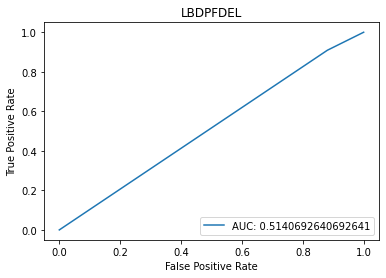

LBDPFHSL


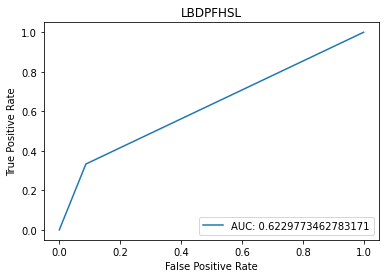

LBDMPAHL


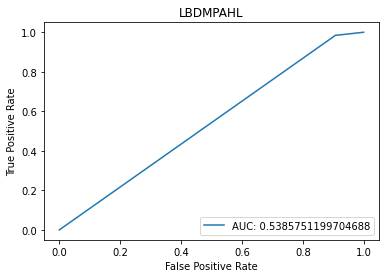

LBDPFBSL


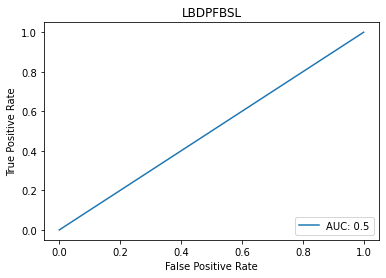

LBDPFHPL


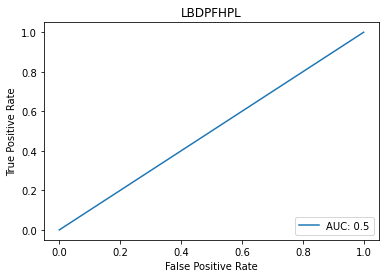

LBDPFNAL


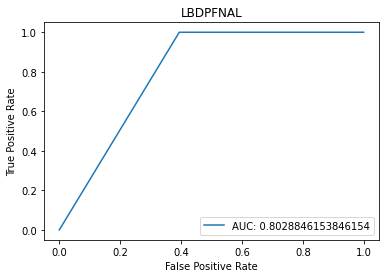

LBDPFUAL


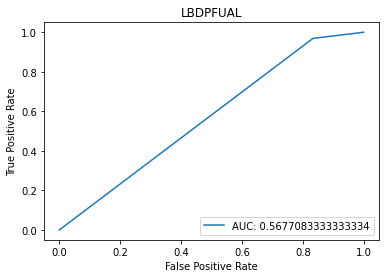

LBDPFDOL


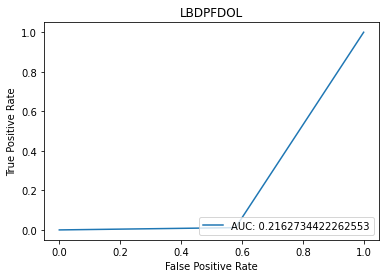

LBD2DFLC


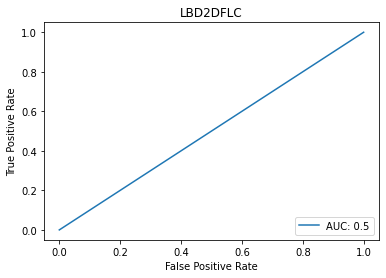

LBDV2ALC


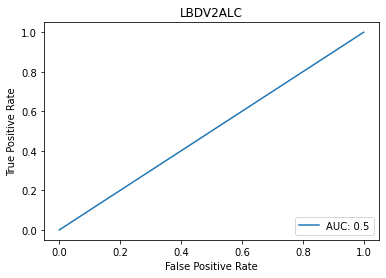

LBDVCBLC


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:992: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning,


ValueError: ignored

In [196]:
from sklearn import metrics
import matplotlib.pyplot as plt 

# predict_proba (NOT COMPARING BINARY ARRAYS)
# does given threshold work? can decide by looking at 2x2 table 

#ROC curve
for col in test_bin_actual.columns:
  print(col)
  fpr, tpr, threshold = metrics.roc_curve(test_bin_actual[col], categorical_pred[col])
  auc = metrics.roc_auc_score(test_bin_actual[col], categorical_pred[col])
  plt.plot(fpr, tpr, label='AUC: '+str(auc))
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.title(col)
  plt.legend(loc=4)
  plt.show()
  

[I have no idea what this means](https://stackoverflow.com/questions/65236646/valueerror-multilabel-indicator-format-is-not-supported-for-roc-curve-sklea)

[confused here as well](https://stackoverflow.com/questions/58430530/valueerror-multiclass-format-is-not-supported)

# comparing with previous imputation method

In [225]:
# imputation 
# detect percentages dictionary : d_p_dropna 
import math
import random
from scipy import stats


# add detection limit where zero entries in column 

# CHECK: make sure using cont. columns, 
#     shouldnt have zero entries (instead lower detect limit)


cont_pred_gm = train_cont_missing.copy()
# continuous : geometric mean
for col in train_cont_missing.columns:
  for row in range(len(train_cont_missing)):
    if math.isnan(train_cont_missing.iloc[row][col]):
      #gmean = stats.gmean()
      cont_pred_gm[col].values[row] = stats.gmean(train_cont_missing.dropna()[col]) # this returns NaN, why??
      #print(cont_pred_gm[col].values[row])

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:339: RuntimeWarning: Mean of empty slice.
  return np.exp(log_a.mean(axis=axis))
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [227]:
df_predict['LBXBCD'].min()

0.07

In [218]:
cont_pred_gm.head()

,LBDPFDEL,LBDPFHSL,LBDMPAHL,LBDPFBSL,LBDPFHPL,LBDPFNAL,LBDPFUAL,LBXPFDO,LBD2DFLC,LBDV2ALC,...,LBXBPB,LBDBPBLC,LBXBCD,LBDBCDLC,LBXTHG,LBDTHGLC,LBXBSE,LBDBSELC,LBXBMN,LBDBMNLC
SEQN,,,,,,,,,,,,,,,,,,,,,
81317.0,1.0,NaN,0.0,NaN,NaN,0.0,1.0,NaN,1.0,NaN,...,0.35,NaN,NaN,0.0,NaN,1.0,NaN,0.0,NaN,0.0
75616.0,NaN,0.0,0.0,1.0,NaN,0.0,NaN,0.07,NaN,NaN,...,0.46,0.0,0.18,0.0,0.57,0.0,206.49,NaN,7.71,NaN
81846.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN,0.07,NaN,1.0,...,NaN,NaN,NaN,NaN,1.06,NaN,196.90,0.0,NaN,0.0
80258.0,NaN,0.0,0.0,NaN,NaN,0.0,NaN,0.07,0.0,1.0,...,NaN,0.0,0.49,0.0,NaN,NaN,194.10,NaN,NaN,NaN
82980.0,NaN,NaN,1.0,1.0,NaN,0.0,1.0,0.07,1.0,NaN,...,0.31,0.0,0.12,NaN,NaN,NaN,NaN,NaN,6.04,NaN


In [217]:
# binary : assign 0 or 1 based on prob. of appearance
bin_pred_proba = train_bin_actual_missing.copy()
for col in train_bin_actual_missing.columns:
  for row in range(len(train_bin_actual_missing)):
    if math.isnan(train_bin_actual_missing[col].values[row]):
      if len(train_bin_actual_missing[col].value_counts()) == 1:
        val = train_bin_actual_missing[col].unique()[np.logical_not(np.isnan(train_bin_actual_missing[col].unique()))][0]
        bin_pred_proba[col].values[row] = val
      else:
        total = train_bin_actual_missing[col].value_counts()[0]+train_bin_actual_missing[col].value_counts()[1]
        zero_weight = (train_bin_actual_missing[col].value_counts()[0] / total)*100
        one_weight = (train_bin_actual_missing[col].value_counts()[1] / total)*100
        bin_pred_proba[col].values[row] = random.choices([0,1], weights = (zero_weight, one_weight), k=1)[0]

In [219]:
bin_pred_proba.head()

,LBDPFDEL,LBDPFHSL,LBDMPAHL,LBDPFBSL,LBDPFHPL,LBDPFNAL,LBDPFUAL,LBDPFDOL,LBD2DFLC,LBDV2ALC,...,URD14DLC,URDDCBLC,LBDIHGLC,LBDBGELC,LBDBGMLC,LBDBPBLC,LBDBCDLC,LBDTHGLC,LBDBSELC,LBDBMNLC
SEQN,,,,,,,,,,,,,,,,,,,,,
81317.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
75616.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
81846.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
80258.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
82980.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
